## 1st Step
### Tokenizing the Entire story
### Story used :- *The Verdict*

In [42]:
with open("the-verdict.txt","r" , encoding="utf-8") as f:
    raw_text = f.read()

print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


### print(raw_text[:99]) is use to print first 100 characters of the sentence

### *We are using Regular Expresion or re library to splitting the data into tokens*

In [43]:
import re
text = "Hello, world. This is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test.']


In [44]:
result = re.split(r'([,.]|\s)', text) ## We are adding . and , as diffrent tokken
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [45]:
result = [item for item in result if item.strip()] ## Removing the witespaces
print(result)

['Hello', ',', 'world', '.', 'This', 'is', 'a', 'test', '.']


### Removing the witespaces is not always good as identation is also important in training the LLM . But here we are removing it to save spave and reduce the computation power

In [46]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [47]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [48]:
print(len(preprocessed))

4690


## 2nd Step
### Converting tokens into token id's
Vocabulary are created during converting tokens into token id's. In this vocabulary words are given number according to the alphabetical order . This number or integer is known as tokenID

In [49]:
all_word = sorted(set(preprocessed))
vocab_size = len(all_word)

print(vocab_size)

1130


In [50]:
vocab ={token:integer for integer,token in enumerate(all_word)}

In [51]:
for i,item in enumerate(vocab.items()):
    print(item)
    if i>=50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


### str_to_int use dictionary [vocab] to convert str to int and
### int_to_str use reverse_dictionary to convert int to str

In [52]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()
                       ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [53]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know,"
            Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [54]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [55]:
# What if we use data which is not in story
#text = "Hello, do you like tea?"
#print(tokenizer.encode(text))

### Dealing with Special Context Tokens
We will modify the tokenizer to handel the unknowns words.
### Unknown and end_of_text

In [56]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [57]:
len(vocab.items())

1132

In [58]:
 for i,item in enumerate(list(vocab.items())[-5:]):
     print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [59]:
class SimpleTokenizerV2:

    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.?!:;_"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [item if item in self.str_to_int
                       else "<|unk|>" for item in preprocessed]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [60]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [61]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [62]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

## There are also other tokens such as the following
### [BOS] (beginning of sequence):
The token mark the start of a text.
### [EOS] (end of sequence):
The token is positioned at the end of a text.
### [PAD] (padding):
while training LLMs with batch size larger than one the batch might contain texts of varying lengths.

## BYTE PAIR ENCODING (BPE)
In GPT model they don't use unknown they use BYTE PAIR ENCODING, in which the words are broken into subwords and these subwords will become tokens.

## Tokenizers Types
1. Word based tokenizer ['My','name','snehal'] Problem-OOV words.
2. Character based tokenizer ['M','y','n','a','m','e','S','n','e','h','a','l'] No OOV words problem, meaning will be lost , too many tokens
3. Sub word based tokenizer
   ### Rules -
   1. Do not split frequentlu used words into smaller subwords.
   2. Split the rare word into smaller meaningful subwords.
      
      eg - "boy" should not be split
           "boys" should be split into "boy" and "s"

BYTE PAIR ALGO IS ALSO A SUB WORD TOKENIZER
   

In [63]:
import importlib
import tiktoken

print("tiktoken version: ", importlib.metadata.version("tiktoken"))

tiktoken version:  0.9.0


In [64]:
tokenizer = tiktoken.get_encoding("gpt2")

In [65]:
text = (
    "Hello do you know me? <|endoftext|> I don't knowyou."
)
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 466, 345, 760, 502, 30, 220, 50256, 314, 836, 470, 760, 5832, 13]


In [66]:
strings = tokenizer.decode(integers)
print(strings)

Hello do you know me? <|endoftext|> I don't knowyou.


In [67]:
integers = tokenizer.encode("Akwifns dfs")
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[33901, 86, 361, 5907, 288, 9501]
Akwifns dfs


In [68]:
integers = tokenizer.encode("Megamasterfull world with no meaning have zero sense")
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[42672, 321, 1603, 12853, 995, 351, 645, 3616, 423, 6632, 2565]
Megamasterfull world with no meaning have zero sense


## Creating Input - Target pairs
Autoregresive

In [69]:
with open("the-verdict.txt","r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [70]:
enc_sample = enc_text[50:]

In [71]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y: {y}")

x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


In [72]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context,"--->",desired)

[290] ---> 4920
[290, 4920] ---> 2241
[290, 4920, 2241] ---> 287
[290, 4920, 2241, 287] ---> 257


Everything left of the arrow (--->) refers to the input an LLM would receive, and the tokenID on the right side of the arrow is the target ID that the LLM will predict

In [73]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context),"--->",tokenizer.decode([desired]))

 and --->  established
 and established --->  himself
 and established himself --->  in
 and established himself in --->  a


We have to create two tensors one input tensors and one output tensors
### Dataset and DataLoader

In [74]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1:i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [75]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
                        stride=128, shuffle=True, drop_last=True,
                        num_workers=0):

    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )
    return dataloader

In [76]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [77]:
print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.6.0+cu124
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [78]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


## CREATING TOKEN EMBEDDINGS

In [79]:
input_ids = torch.tensor([2, 3, 5, 1])

### We are using the embedding size of 3

In [80]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [81]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


### These weights are random they are normalized during LLM training

In [82]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [83]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [84]:
tdx = torch.tensor([2, 3, 1])

In [85]:
vocab_size = 4
output_dim = 5
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [86]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035, -0.5880,  1.5810],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015],
        [ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953]], requires_grad=True)


In [87]:
print(embedding_layer(tdx))

tensor([[ 0.6957, -1.8061, -1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096, -0.4076,  0.7953],
        [ 1.3010,  1.2753, -0.2010, -0.1606, -0.4015]],
       grad_fn=<EmbeddingBackward0>)


## POSITIONAL EMBEDDING (ENCODING WORD POSITIONS)
We are going to assume that the token IDs were created by the BPE tokenizer, which hasvocabolary size of almost 50257  tokens

In [88]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [89]:
max_length=4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, target = next(data_iter)

In [90]:
print("Token IDs:\n" , inputs)
print("\nInput shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Input shape:
 torch.Size([8, 4])


In [91]:
token_embedding = token_embedding_layer(inputs)
print(token_embedding.shape)

torch.Size([8, 4, 256])


In [92]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [93]:
pos_embedding = pos_embedding_layer(torch.arange(max_length))
print(pos_embedding.shape)

torch.Size([4, 256])


In [1]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
    [0.55, 0.87, 0.66], # journey (x^2)
    [0.57, 0.85, 0.64], # start (x^3)
    [0.22, 0.58, 0.33], # with (x^4)
    [0.77, 0.25, 0.10], # one (x^5)
    [0.05, 0.80, 0.55] # step (x^6)
    ]
)

In [2]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
  attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [3]:
attn_weights_2_temp = attn_scores_2 / attn_scores_2.sum()

print("Attention weights :",attn_weights_2_temp)
print("Sum :", attn_weights_2_temp.sum())

Attention weights : tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum : tensor(1.0000)


In [4]:
def softmax_naive(x):
  return torch.exp(x) / torch.exp(x).sum()

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights :",attn_weights_2_naive)
print("Sum :", attn_weights_2_naive.sum())

Attention weights : tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum : tensor(1.)


In [5]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights :", attn_weights_2)
print("Sum : ", attn_weights_2.sum())

Attention weights : tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum :  tensor(1.)


In [6]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
  context_vec_2 += attn_weights_2[i]* x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


### Attnetion scores of all the inputs

In [7]:
attn_scores = torch.empty(6,6)

for i, x_i in enumerate(inputs):
  for j, x_j in enumerate(inputs):
    attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [8]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


### Finding the Attention weigths of all the inputs

In [9]:
attn_weights = torch.softmax(attn_scores, dim=-1)
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

By setting dim=-1 we are instructing the softmax function to apply the normalization along the last dimention of the attn_scores tensor

### Finding the Context vector

In [10]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


IMPLEMENTING SELF ATTENTION WITH TRAINABLE WEIGHTS

In [11]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
    [0.55, 0.87, 0.66], # journey (x^2)
    [0.57, 0.85, 0.64], # start (x^3)
    [0.22, 0.58, 0.33], # with (x^4)
    [0.77, 0.25, 0.10], # one (x^5)
    [0.05, 0.80, 0.55] # step (x^6)
    ])

In models the inputs and output dimentions are always same.

In [12]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [13]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [14]:
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [15]:
print(W_key)

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])


In [16]:
print(W_value)

Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [17]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2,"\n",key_2,"\n",value_2)

tensor([0.4306, 1.4551]) 
 tensor([0.4433, 1.1419]) 
 tensor([0.3951, 1.0037])


In [18]:
queries = inputs @ W_query
keys = inputs @ W_key
values = inputs @ W_value

print(f"Query.shape: {queries.shape}")
print(f"Keys.shape: {keys.shape}")
print(f"Values.shape: {values.shape}")

Query.shape: torch.Size([6, 2])
Keys.shape: torch.Size([6, 2])
Values.shape: torch.Size([6, 2])


In [19]:
print(f"Query matrix: {queries}\n")
print(f"Keys matrix: {keys}\n")
print(f"Values matrix: {values}")

Query matrix: tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]])

Keys matrix: tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])

Values matrix: tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]])


In [20]:
keys_2 = keys[1]

attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [21]:
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [22]:
attn_scores = queries @ keys.T
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


### Scaling

In [23]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)
print(d_k)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


In [24]:
d_k = keys.shape[-1]
attn_weights = torch.softmax(attn_scores / d_k**0.5, dim=-1)
print(attn_weights)
print(d_k)

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])
2


## Context vector

In [25]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


IMPLEMENTING A COMPACT SELF ATTENTION PYTHON CLASS

In [26]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

  def __init__(self, d_in, d_out):
    super().__init__()
    self.W_query = nn.Parameter(torch.rand(d_in, d_out))
    self.W_key = nn.Parameter(torch.rand(d_in, d_out))
    self.W_value = nn.Parameter(torch.rand(d_in, d_out))

  def forward(self, x):
    querys = x @ self.W_query
    keys = x @ self.W_key
    values = x @ self.W_value

    attn_score = querys @ keys.T
    attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

    context_vec = attn_weights @ values
    return context_vec

In [27]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [28]:
class SelfAttention_v2(nn.Module):

  def __init__(self, d_in, d_out,qkv_bias=False):
    super().__init__()
    self.W_query = nn.Linear(d_in, d_out , bias = qkv_bias)
    self.W_key = nn.Linear(d_in, d_out , bias = qkv_bias)
    self.W_value = nn.Linear(d_in, d_out , bias = qkv_bias)

  def forward(self, x):
    querys = self.W_query(x)
    keys = self.W_key(x)
    values = self.W_value(x)

    attn_score = querys @ keys.T
    attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)

    context_vec = attn_weights @ values
    return context_vec

In [29]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0938,  0.0499],
        [-0.0985,  0.0460],
        [-0.0982,  0.0462],
        [-0.0901,  0.0535],
        [-0.0883,  0.0552],
        [-0.0934,  0.0503]], grad_fn=<MmBackward0>)


## HIDING FUTURE WORDS WITH CASUAL ATTENTION

In [30]:
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
    [0.55, 0.87, 0.66], # journey (x^2)
    [0.57, 0.85, 0.64], # start (x^3)
    [0.22, 0.58, 0.33], # with (x^4)
    [0.77, 0.25, 0.10], # one (x^5)
    [0.05, 0.80, 0.55] # step (x^6)
    ])

In [31]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [32]:
context_length = attn_scores.shape[0]
mask_simple  = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [33]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [34]:
row_sums = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


### The Better Way

In [35]:
print(attn_scores)

tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)


In [36]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [37]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


### MASKING ADDITION ATTENTION WEIGHTS USING DROPOUT

In [38]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [39]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


### IMPLEMENTING A COMPACT CAUSAL ATTENTION CLASS

In [40]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [41]:
class CausalAttention(nn.Module):

  def __init__(self, d_in, d_out, context_lenght, dropout,
               qkv_bias = False):
    super().__init__()
    self.d_out = d_out
    self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.dropout = nn.Dropout(dropout)
    self.register_buffer('mask', torch.triu(torch.ones(context_lenght, context_lenght), diagonal=1))

  def forward(self, x):
    b, num_tokens, d_in = x.shape # Here b is the batch size
    keys = self.W_key(x)
    queries = self.W_query(x)
    values = self.W_value(x)

    attn_scores = queries @ keys.transpose(1, 2) #we only need  num_tokens and d_in
    attn_scores.masked_fill(
        self.mask.bool() [:num_tokens, :num_tokens], -torch.inf)
    attn_weights =torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1
    )
    attn_weights = self.dropout(attn_weights)

    context_vec = attn_weights @ values
    return context_vec


In [42]:
print(d_in)

3


In [43]:
print(d_out)

2


In [44]:
torch.manual_seed(123)
context_lenght = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vec = ca(batch)
print("Context_vec.shape:", context_vec.shape)

Context_vec.shape: torch.Size([2, 6, 2])


In [45]:
print(context_vec)

tensor([[[-0.5337, -0.1051],
         [-0.5323, -0.1080],
         [-0.5323, -0.1079],
         [-0.5297, -0.1076],
         [-0.5311, -0.1066],
         [-0.5299, -0.1081]],

        [[-0.5337, -0.1051],
         [-0.5323, -0.1080],
         [-0.5323, -0.1079],
         [-0.5297, -0.1076],
         [-0.5311, -0.1066],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


## EXTENDING SINGLE HEAD ATTENTION TO MULTI-HEAD ATTENTION

In [46]:
## USing MultiHeadAttentionWrapper

class MultiHeadAttentionWrapper(nn.Module):
  def __init__(self, d_in, d_out, context_lenght, dropout, num_heads, qkv_bias=False):
    super().__init__()
    self.heads = nn.ModuleList(
        [CausalAttention(d_in, d_out, context_lenght, dropout, qkv_bias)
        for _ in range(num_heads)]
    )

  def forward(self, x):
    return torch.cat([head(x) for head in self.heads], dim=-1)

In [47]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [48]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_lenght, 0.0, num_heads=2)
context_vec = mha(batch)
print(context_vec)
print("context_vec shape: ",context_vec.shape)

tensor([[[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vec shape:  torch.Size([2, 6, 4])


## IMPLEMENTING MULTI-HEAD ATTENTION WITH WEIGHT SPLITS

In [25]:
class MultiHeadAttention(nn.Module):
  def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
    super().__init__()
    assert (d_out % num_heads == 0), \
    "d_out must be divisible by num_heads"

    self.d_out = d_out
    self.num_heads = num_heads
    self.head_dim = d_out // num_heads # Reduce the projection dim to match the desired output dim

    self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.out_proj = nn.Linear(d_out, d_out) # Linear layer to combine head outputs
    self.dropout = nn.Dropout(dropout)
    self.register_buffer(
        "mask",
        torch.triu(torch.ones(context_length, context_length),
                   diagonal=1)
    )
  def forward(self, x):
    b, num_tokens, d_in = x.shape

    keys = self.W_key(x) # Shape: b, num_tokens, d_out
    queries = self.W_query(x)
    values = self.W_value(x)

    # We implicitly split the matrix by adding a 'num_heads dimension'
    # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
    keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
    values = values.view(b, num_tokens, self.num_heads, self.head_dim)
    queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

    # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
    keys = keys.transpose(1, 2)
    queries = queries.transpose(1, 2)
    values = values.transpose(1, 2)

    # Computing  the dot product attention with a casual mask
    attn_scores = queries @ keys.transpose(2,3)

    mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

    # Use the mask to fill the attention scores
    attn_scores.masked_fill_(mask_bool, -torch.inf)

    attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
    attn_weights = self.dropout(attn_weights)

    # Shape: (b, num_tokens, num_heads, head_dim)
    context_vec = (attn_weights @ values).transpose(1, 2)

    # Combining heads, where self.d_out = self.num_heads * self.head_dim
    context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
    context_vec = self.out_proj(context_vec)

    return context_vec

In [26]:
torch.manual_seed(123)

inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

batch.size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape :",context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape : torch.Size([2, 3, 6])


## IMPLEMENTING GPT MODEL FROM SCRATCH TO GENERATE TEXT

In [27]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,  # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768, # Embedding dimension
    "n_heads": 12,  # Number of attention heads
    "n_layers": 12, # Number of layers
    "drop_rate": 0.1, # Dropout rate
    "qkv_bias": False # Query-Key-Value bias
}

### GPT ARCHITECTURE PART 1: DUMMY GPT MODEL CLASS

In [28]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
    self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
    self.drop_emb = nn.Dropout(cfg["drop_rate"])

    # Use a placeholder for TransformerBlock
    self.trf_blocks = nn.Sequential(
        *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]
    )

    # Us a placeholder for LayerNorm
    self.final_norm = DummyLayerNorm(cfg["emb_dim"])
    self.out_head = nn.Linear(
        cfg["emb_dim"], cfg["vocab_size"], bias=False
    )

  def forward(self, in_idx):
    batch_size, seq_len = in_idx.shape
    tok_embeds = self.tok_emb(in_idx)
    pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
    x = tok_embeds + pos_embeds
    x = self.drop_emb(x)
    x = self.trf_blocks(x)
    x = self.final_norm(x)
    logits  = self.out_head(x)
    return logits

class DummyTransformerBlock(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    # A simple placeholder

  def forward(self, x):
    # This block does nothing and just returns its inputs.
    return x

class DummyLayerNorm(nn.Module):
  def __init__(self, normalized_shape, eps=1e-5):
    super().__init__()
    # The parameters here are just to mimic the LayerNorm interface.

  def forward(self, x):
    # This layer does nothing and just returns its input.
    return x

### STEP 1: TOKENIZATION

In [29]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


### STEP 2: CREATE AN INSTANCE OF DUMMY GPT MODEL

In [30]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


### GPT ARCHITECTURE PART 2: LAYER NORMALIZATION

Example with simple example

In [31]:
import torch
torch.manual_seed(123)
batch_example = torch.randn(2, 5)
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [32]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean :\n",mean)
print("Varience :\n",var)

Mean :
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Varience :
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [33]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized Layer output :\n",out_norm)
print("Mean :\n",mean)
print("Varience :\n",var)

Normalized Layer output :
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean :
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Varience :
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [34]:
torch.set_printoptions(sci_mode=False)
print("Mean :\n",mean)
print("Varience :\n",var)

Mean :
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Varience :
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [35]:
class LayerNorm(nn.Module):
  def __init__(self, emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    vari = x.var(dim=-1, keepdim=True, unbiased=False)
    norm_x = (x - mean) / torch.sqrt(var + self.eps)
    return self.scale * norm_x + self.shift

In [36]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True )
print("Mean :\n", mean)
print("Varience :\n", var)

Mean :
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Varience :
 tensor([[0.2015],
        [0.2673]], grad_fn=<VarBackward0>)


### GPT ARCHITECTURE PART 3: FEEDFORWARD NEURAL NETWORK WITH GELU ACTIVATION

In [37]:
class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return 0.5 *x * (1 + torch.tanh(
        torch.sqrt(torch.tensor(2.0 / torch.pi)) *
        (x + 0.044715 * torch.pow(x, 3))
    ))

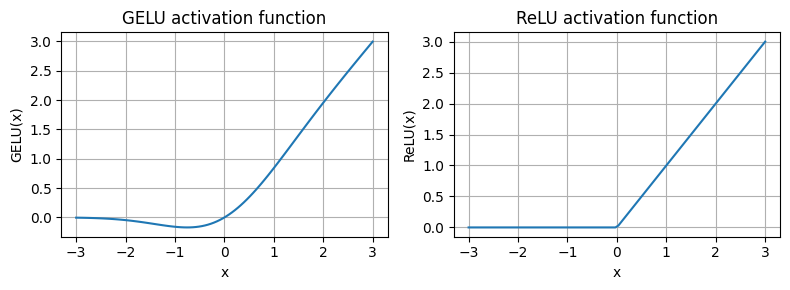

In [38]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
  plt.subplot(1, 2, i)
  plt.plot(x, y)
  plt.title(f"{label} activation function")
  plt.xlabel("x")
  plt.ylabel(f"{label}(x)")
  plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
class FeedForward(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), # Expansion
        GELU(), # Activation
        nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]) # Contraction
    )

  def forward(self, x):
    return self.layers(x)

In [40]:
print(GPT_CONFIG_124M["emb_dim"])

768


In [41]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


### GPT ARCHITECTURE PART 4: SHORTCUT CONNECTIONS

In [42]:
class ExampleDeepNeuralNetwork(nn.Module):
  def __init__(self, layer_sizes, use_shortcut):
    super().__init__()
    self.use_shortcut = use_shortcut
    self.layers = nn.ModuleList([
        nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
        nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
    ])

  def forward(self, x):
    for layers in self.layers:
      # Compute the output of the current layer
      layers_output = layers(x)
      # Check if shortcut can be applied
      if self.use_shortcut and x.shape == layers_output.shape:
        x = x + layers_output
      else:
        x = layers_output
    return x

In [43]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False
)

In [44]:
def print_gradients(model, x):
  # Forward pass
  output = model(x)
  target = torch.tensor([[0.]])

  # Calculate the loss based on how close the target is
  # and the output are
  loss = nn.MSELoss()
  loss = loss(output, target)

  # Backward pass to calcute the gradient
  loss.backward()

  for name, param in model.named_parameters():
    if 'weight' in name:
      # Print the mean absolute gradient of the weights
      print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [45]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173584925942123
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


In [46]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169791162014008
layers.1.0.weight has gradient mean of 0.20694105327129364
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576


### GPT ARCHITECTURE PART 5: CODING ATTENTION LINEAR LAYERS IN A TRANSFORMER BLOCK

In [47]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,  # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768, # Embedding dimension
    "n_heads": 12,  # Number of attention heads
    "n_layers": 12, # Number of layers
    "drop_rate": 0.1, # Dropout rate
    "qkv_bias": False # Query-Key-Value bias
}

THE BUILDING BLOCK: LAYER NORMALIZATION, GELU AND FEED-FORWARD NEURAL NETWORK

In [48]:
class LayerNorm(nn.Module):
  def __init__(self, emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    var = x.var(dim=-1, keepdim=True, unbiased=False)
    norm_x = (x - mean) / torch.sqrt(var + self.eps)
    return self.scale * norm_x + self.shift

class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    return 0.5 * x * (1 + torch.tanh(
        torch.sqrt(torch.tensor(2.0 / torch.pi)) *
        (x + 0.044715 * torch.pow(x, 3))
    ))

class FeedForwardNetwork(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
        GELU(),
        nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
    )

  def forward(self, x):
    return self.layers()

In [51]:
class TransformerBlock(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.attn = MultiHeadAttention(
        d_in = cfg["emb_dim"],
        d_out = cfg["emb_dim"],
        context_length = cfg["context_length"],
        num_heads = cfg["n_heads"],
        dropout = cfg["drop_rate"],
        qkv_bias = cfg["qkv_bias"])

    self.ff = FeedForward(cfg)
    self.norm1 = LayerNorm(cfg["emb_dim"])
    self.norm2 = LayerNorm(cfg["emb_dim"])
    self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

  def forward(self, x):
    # Shortcut connection for attention block
    shortcut = x
    x = self.norm1(x)
    x = self.attn(x)  # Shape [batch_size, num_tokens, emb_size]
    x = self.drop_shortcut(x)
    x = x + shortcut  # Add the original input back

    # Shortcut connection for feed forward block
    shortcut = x
    x = self.norm2(x)
    x = self.ff(x)
    x = self.drop_shortcut(x)
    x = x + shortcut   # Add the original input back

    return x

In [52]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768)
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])
